# 📊 A Comprehensive Introduction to Data Visualization with Seaborn

Welcome to your 2-hour deep dive into Seaborn! Get ready to transform raw data into beautiful and insightful graphics. 🚀

### 📘 Overview and Learning Objectives

**What is Seaborn?**
Seaborn is a Python data visualization library built on top of Matplotlib. It's designed to make creating attractive and informative statistical graphics easy. Think of Matplotlib as the engine and Seaborn as the sleek, user-friendly dashboard that helps you drive.

**Why does it matter?**
In data science, a picture is truly worth a thousand words (or a thousand rows of data!). Effective visualizations help us to:
- **Explore Data (EDA):** Quickly understand patterns and trends.
- **Communicate Findings:** Clearly show our results to others.
- **Diagnose Models:** Understand how our machine learning models are performing.

**🎯 By the end of this 2-hour session, you will be able to:**
1. Create a wide range of **Distribution Plots** (`histplot`, `kdeplot`, `rugplot`, `jointplot`, `pairplot`).
2. Build powerful **Categorical Plots** (`countplot`, `barplot`, `stripplot`, `swarmplot`, `boxplot`, `violinplot`, `catplot`).
3. Generate a `heatmap` to visualize matrix-like data.
4. Understand the difference between key plots and when to use them.
5. Feel confident enough to explore new datasets on your own!

### ⚙️ Initial Setup

First, let's import the libraries we'll need for the entire session and prepare our datasets. We will rename the `sex` column to `gender` in the `tips` and `titanic` datasets for clearer, more inclusive language.

In [24]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load and prepare datasets
tips = sns.load_dataset("tips")
tips.rename(columns={'sex': 'gender'}, inplace=True)

titanic = sns.load_dataset("titanic")
titanic.rename(columns={'sex': 'gender'}, inplace=True)

iris = sns.load_dataset("iris")
flights = sns.load_dataset("flights")

print("Datasets loaded and prepared successfully!")
tips.head()

Datasets loaded and prepared successfully!


,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 💡 Part 1: Visualizing Distributions

Let's start by understanding the *shape* of our data. Distribution plots help us see where our data points are clustered, how spread out they are, and if there are any outliers.

### Topic 1: `histplot` & `kdeplot` - The Shape of Data

📄 **Explanation:**
- **`histplot` (Histogram):** Divides data into 'bins' and counts how many data points fall into each bin. It's great for seeing frequency.
- **`kdeplot` (Kernel Density Estimate):** Provides a smoothed, continuous line to estimate the probability density. Think of it as a smooth version of a histogram.

They are often used together to get a complete picture of the distribution.

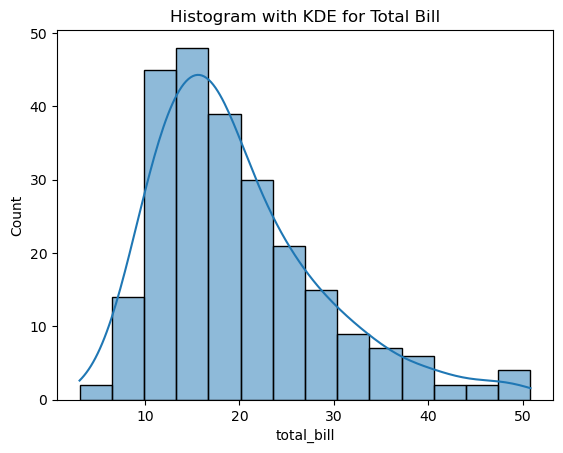

In [3]:
# Example: Using histplot with a KDE overlay
sns.histplot(data=tips, x='total_bill', kde=True)
plt.title('Histogram with KDE for Total Bill')
plt.show()

In [7]:
print(tips.columns)

Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'time', 'size'], dtype='object')


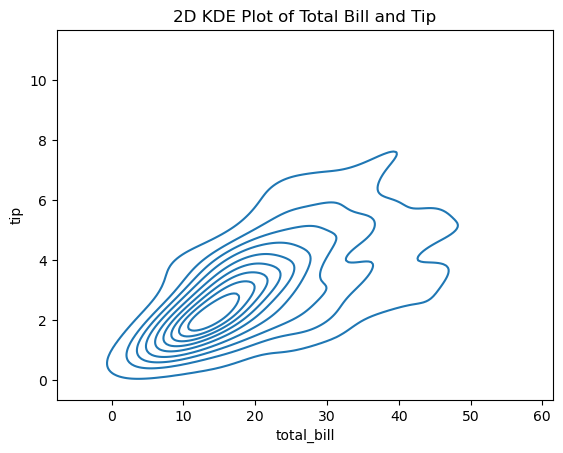

In [6]:
# Example: A 2D KDE plot to show joint probability density
sns.kdeplot(data=tips, x="total_bill", y="tip")
plt.title('2D KDE Plot of Total Bill and Tip')
plt.show()

### 🧠 Practice Task: Distribution of Tips

**Your Goal:** Create a `histplot` for the `tip` column in the `tips` dataset. Make sure to add the KDE line.

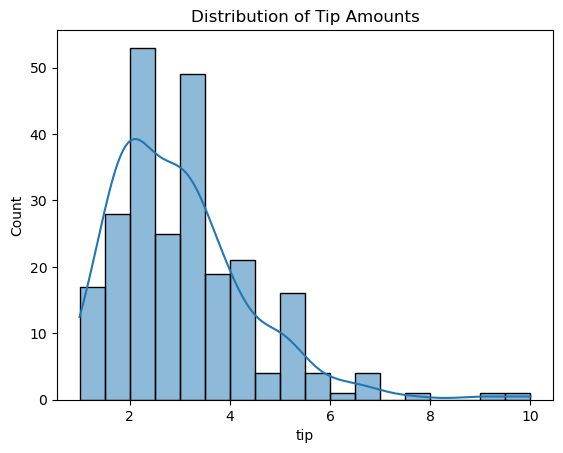

In [8]:
# --- YOUR CODE HERE --- #
sns.histplot(data=tips, x='tip', kde=True)
plt.title('Distribution of Tip Amounts')
plt.show()

### Topic 2: `rugplot` - Every Data Point Matters

📄 **Explanation:**
A `rugplot` is very simple: it draws a small vertical tick at each observation along an axis. It's used to visualize the distribution of a single variable. While it can be used on its own, it's most effective when added to another plot to show the precise location of individual data points.

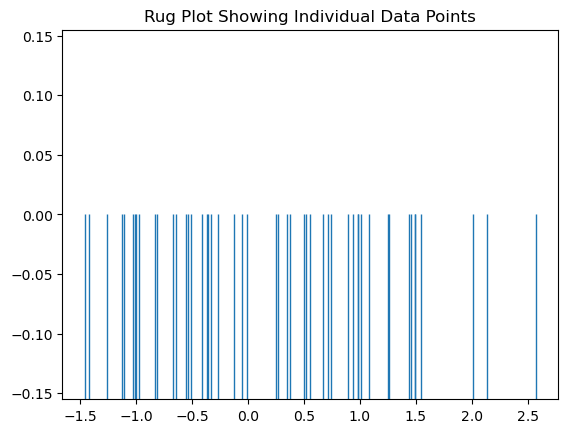

In [9]:
# Example: A standalone rugplot
sample_data = np.random.randn(50)
sns.rugplot(x=sample_data, height=0.5)
plt.title('Rug Plot Showing Individual Data Points')
plt.show()

### 🧠 Practice Task: Rugs on a KDE

**Your Goal:** Create a `kdeplot` for the `tip` column and add a `rugplot` on top of it to see both the smooth distribution and the individual data points.

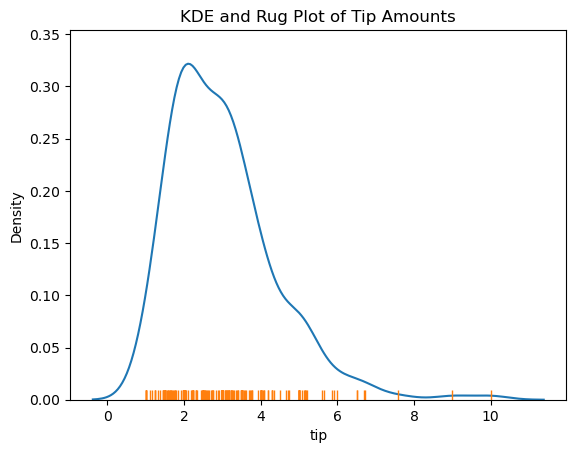

In [10]:
# --- YOUR CODE HERE --- #
sns.kdeplot(data=tips, x='tip')
sns.rugplot(data=tips, x='tip')
plt.title('KDE and Rug Plot of Tip Amounts')
plt.show()

### Topic 3: `jointplot` & `pairplot` - Seeing the Big Picture

📄 **Explanation:**
- **`jointplot`:** Shows the relationship between two variables (bivariate) and the distribution of each variable (univariate) in one figure.
- **`pairplot`:** Creates a grid showing the relationship between every pair of numerical variables in a dataset. It's the ultimate quick overview!

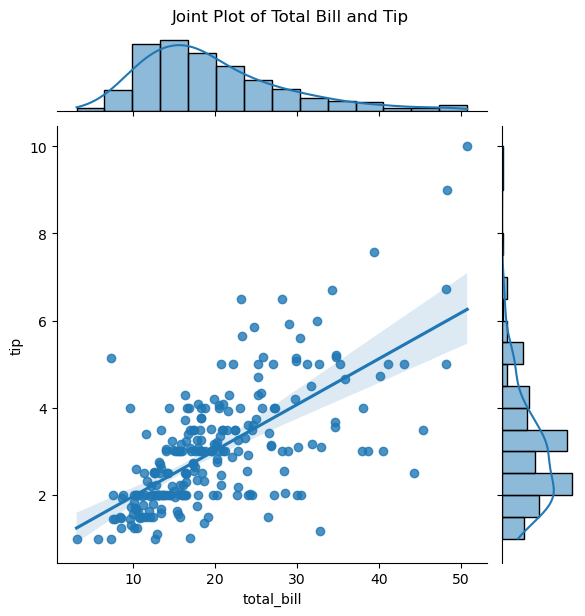

In [11]:
# Example: jointplot with a regression line
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg")
plt.suptitle('Joint Plot of Total Bill and Tip', y=1.02)
plt.show()

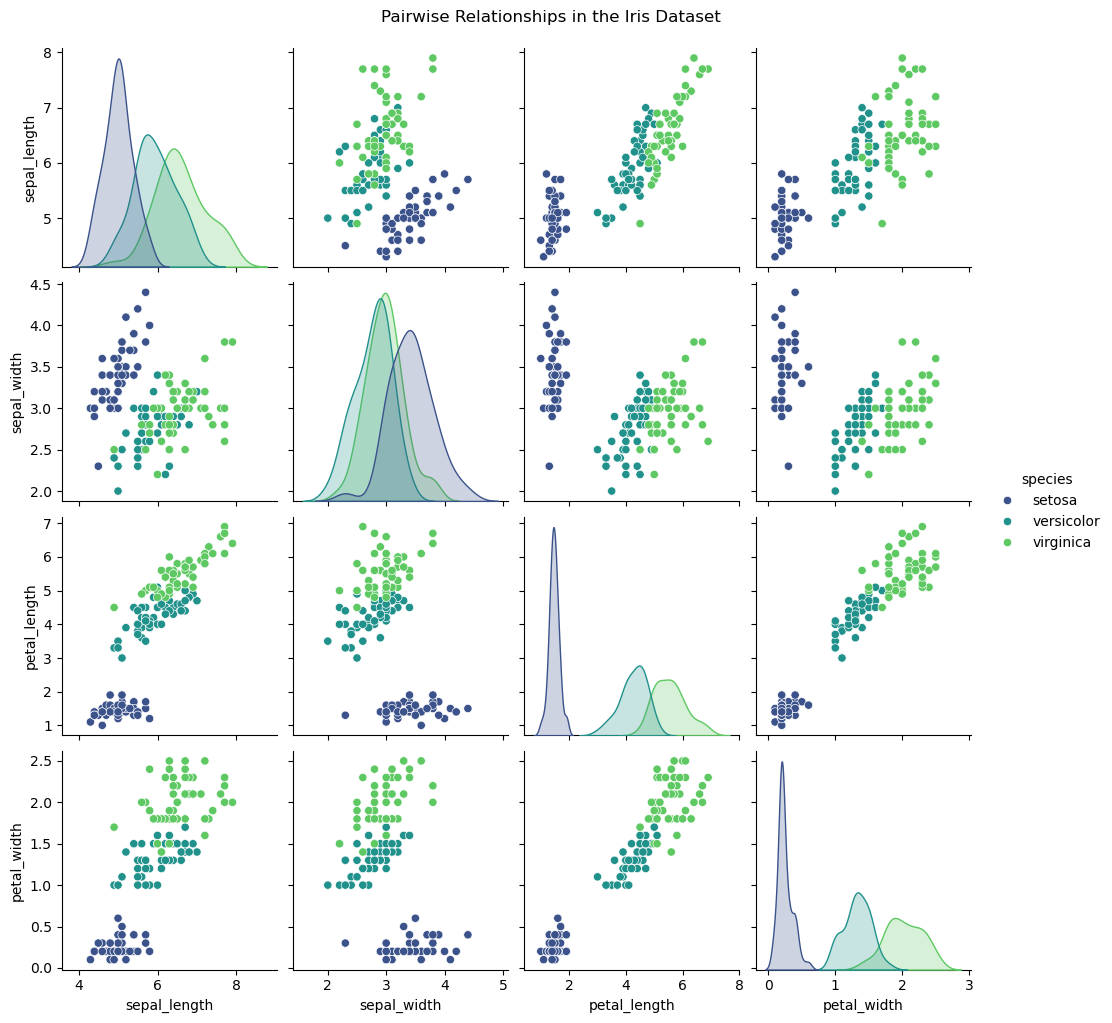

In [12]:
# Example: pairplot colored by a category
sns.pairplot(iris, hue="species", palette="viridis")
plt.suptitle('Pairwise Relationships in the Iris Dataset', y=1.02)
plt.show()

## 💡 Part 2: Visualizing Categorical Data

✅ **Excellent!** You've learned to see the shape of data. Now, let's learn how to compare different groups. Categorical plots are perfect for this.

### Topic 4: `countplot` vs `barplot` - A Tale of Two Counts

📄 **Explanation:**
- **`countplot`**: Simply counts the occurrences of items in each category. It's a histogram for categorical data.
- **`barplot`**: Shows an estimate of central tendency (like the mean) for a numeric variable, grouped by a category. The error bars show the uncertainty.

**Mantra:** Use `countplot` for "how many?". Use `barplot` for "what's the average?".

In [13]:
print(titanic.columns)

Index(['survived', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


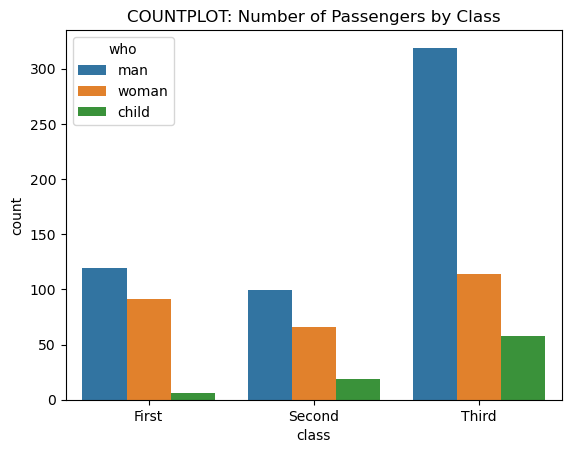

In [14]:
# Example: countplot - How many passengers in each class?
sns.countplot(data=titanic, x="class", hue="who")
plt.title('COUNTPLOT: Number of Passengers by Class')
plt.show()

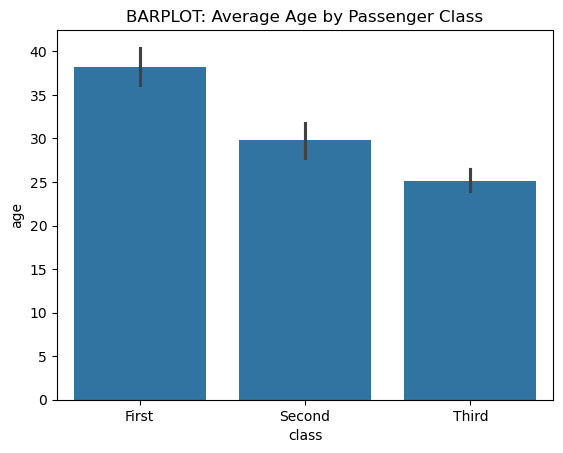

In [15]:
# Example: barplot - What was the average age per class?
sns.barplot(data=titanic, x="class", y="age")
plt.title('BARPLOT: Average Age by Passenger Class')
plt.show()

### 🧠 Practice Task: Smoking Habits by Day

**Your Goal:** Use a `countplot` on the `tips` dataset to see how many smokers vs. non-smokers there were on each day of the week. Put `day` on the x-axis and use `smoker` for the `hue`.

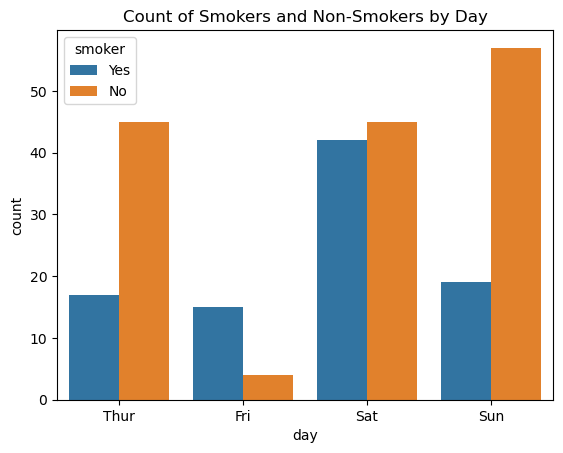

In [16]:
# --- YOUR CODE HERE --- #
sns.countplot(data=tips, x='day', hue='smoker')
plt.title('Count of Smokers and Non-Smokers by Day')
plt.show()

### Topic 5: `stripplot` & `swarmplot` - Showing Every Observation

📄 **Explanation:**
Both plots show every single data point, which is great for small datasets.
- **`stripplot`**: A simple scatter plot for a categorical variable. Points can overlap, so we often add `jitter` to spread them out.
- **`swarmplot`**: Similar to a stripplot, but it uses an algorithm to adjust the points so they don't overlap. This gives a better view of the distribution.

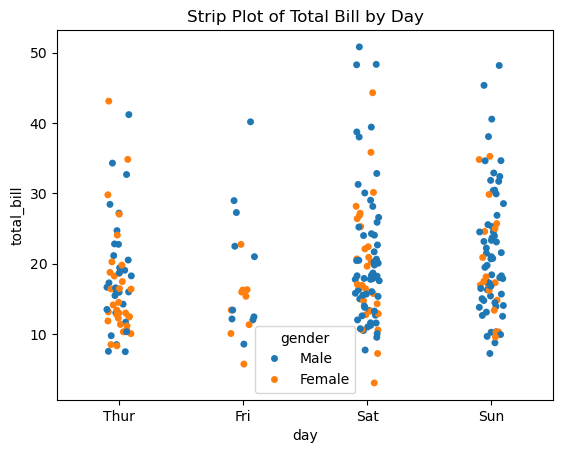

In [17]:
# Example: stripplot with jitter
sns.stripplot(data=tips, x="day", y="total_bill", jitter=True, hue="gender")
plt.title('Strip Plot of Total Bill by Day')
plt.show()

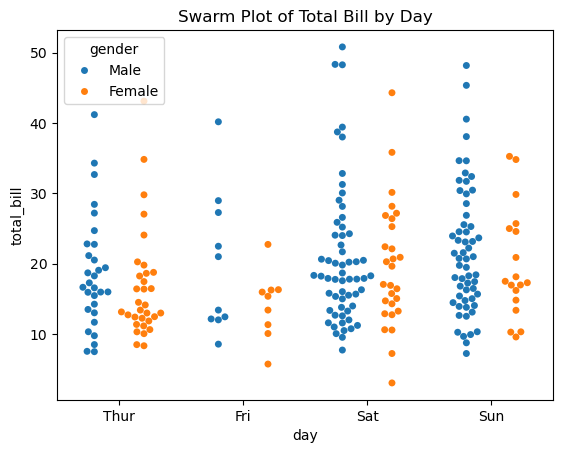

In [18]:
# Example: swarmplot (no overlap!)
sns.swarmplot(data=tips, x="day", y="total_bill", hue="gender", dodge=True)
plt.title('Swarm Plot of Total Bill by Day')
plt.show()

### Topic 6: `boxplot` & `violinplot` - Summarizing Distributions

📄 **Explanation:**
- **`boxplot`**: Provides a five-number summary (min, Q1, median, Q3, max) of the data. Excellent for comparing distributions and spotting outliers.
- **`violinplot`**: A more advanced plot combining a boxplot with a KDE plot. The "violin" shape shows the probability density, revealing more detail like bimodal distributions.

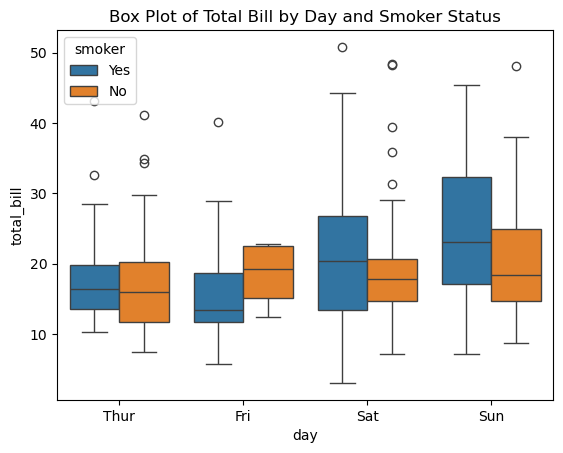

In [19]:
# Example: boxplot comparing distributions
sns.boxplot(data=tips, x="day", y="total_bill", hue="smoker")
plt.title('Box Plot of Total Bill by Day and Smoker Status')
plt.show()

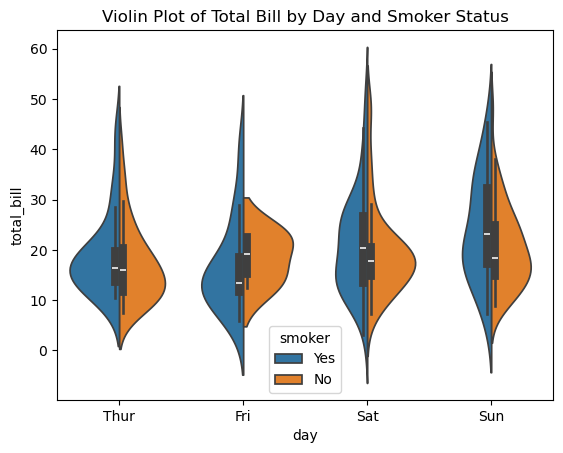

In [20]:
# Example: violinplot showing more detail
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker", split=True)
plt.title('Violin Plot of Total Bill by Day and Smoker Status')
plt.show()

### Topic 7: `catplot` - The Master of Categorical Plots

📄 **Explanation:**
`catplot` is a figure-level function that provides a unified way to create many of the categorical plots you've just seen (`box`, `violin`, `bar`, `strip`, etc.). Its superpower is its ability to create "faceted" plots (subplots) using the `col` and `row` parameters. This is the modern replacement for the older `factorplot`.

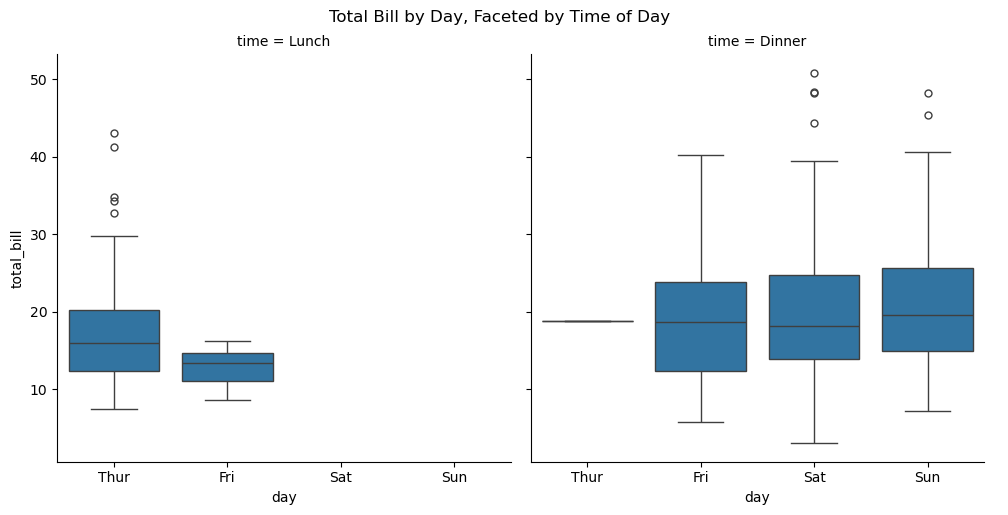

In [21]:
# Example: catplot creating faceted boxplots
# col='time' creates separate columns for 'Lunch' and 'Dinner'
sns.catplot(data=tips, x="day", y="total_bill", kind="box", col="time")
plt.suptitle('Total Bill by Day, Faceted by Time of Day', y=1.02)
plt.show()

### 📄 Explanation: The Master of Categorical Plots

**`catplot`** is a **figure-level** function that provides a single, unified interface to create many different types of categorical plots. Think of it as a control panel for creating plots that compare data across different categories.

**Key Features:**
1.  **It's a Wrapper:** You choose the specific type of plot you want using the `kind` parameter. Options include `'strip'`, `'swarm'`, `'box'`, `'violin'`, `'bar'`, and `'point'`.
2.  **Its Superpower is Faceting:** The main strength of `catplot` is its ability to easily create subplots (or "facets") based on other categorical variables. You can split your data into different columns of plots using the `col` parameter or different rows of plots using the `row` parameter.

Because it creates the entire figure (including subplots), it's called a "figure-level" function. This is different from "axes-level" functions like `boxplot` or `stripplot` which only draw on a single set of axes.

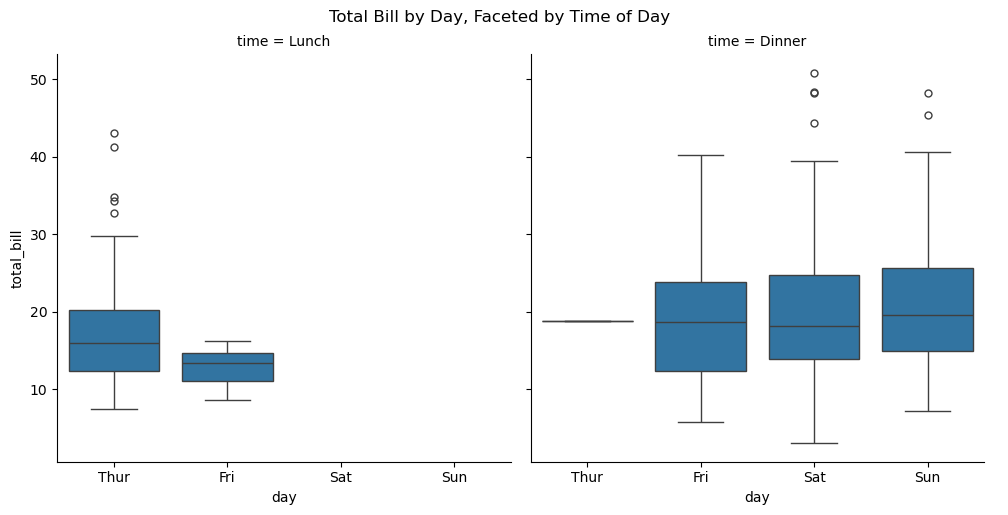

In [25]:
# --- Example --- #
# We will use catplot to create boxplots of 'total_bill' by 'day'.
# The key part is col='time', which creates separate plots for 'Lunch' and 'Dinner'.

sns.catplot(data=tips,       # The dataset to use
            x="day",          # Variable on the x-axis
            y="total_bill",   # Variable on the y-axis
            kind="box",       # The type of plot to create
            col="time")       # The variable to create column facets with

# Add a main title above the subplots
plt.suptitle('Total Bill by Day, Faceted by Time of Day', y=1.02)
plt.show()

### 🧠 Practice Task: Faceted Swarm

**Your Goal:** Use `catplot` to create a `swarmplot` (`kind='swarm'`) of `tip` amount by `smoker` status. Use `col='gender'` to create separate plots for each gender.

In [23]:
# --- YOUR CODE HERE --- #
sns.catplot(data=tips, x='smoker', y='tip', kind='swarm', col='gender')
plt.suptitle('Tip Amount by Smoker Status, Faceted by Gender', y=1.02)
plt.show()

ValueError: Could not interpret value `gender` for `col`. An entry with this name does not appear in `data`.

## 💡 Part 3: Visualizing Matrix Data

Sometimes your data is in a grid or matrix format. A heatmap is the perfect tool for this.

### Topic 8: `heatmap` - Seeing Patterns in Color

📄 **Explanation:**
A `heatmap` represents individual values in a matrix as colors. The color intensity indicates the magnitude, making it easy to spot patterns, clusters, and high- or low-value areas at a glance. It's incredibly useful for visualizing correlation matrices.

In [ ]:
# We need data in a matrix format. Let's pivot the flights dataset.
flights_pivot = flights.pivot(index="month", columns="year", values="passengers")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(flights_pivot, cmap="magma", annot=True, fmt='d', linewidths=1)
plt.title('Heatmap of Airline Passengers by Month and Year')
plt.show()

## 🎉 Final Revision Assignment 🎉

Congratulations on making it through the session! Now it's time to put everything you've learned together. These tasks are designed for you to practice at home to solidify your new skills.

### Task 1: Titanic Age Distribution

Using the `titanic` dataset, create a `violinplot` that shows the distribution of passenger `age` for each `class` ('First', 'Second', 'Third').

**Challenge:** Further, split the violins to compare `gender` within each class (`hue='gender'`, `split=True`).

In [ ]:
# Your code for Task 1 here

### Task 2: Iris Correlation Heatmap

Create a correlation matrix for the numerical columns in the `iris` dataset. Then, visualize this matrix using a `heatmap`. Make sure to **annotate** the heatmap with the correlation values and use a different colormap like `'coolwarm'`.

In [ ]:
# Your code for Task 2 here

### Task 3: Barplot vs. Countplot (In Your Own Words)

Double-click this markdown cell to edit it.

Explain the key difference between a `barplot` and a `countplot`. When would you use one over the other?

*Your answer here...*

### Task 4: Case Study with `catplot`

You are analyzing student test scores. You want to see how the `score` is related to `study_hours` but also see if this relationship differs by `subject`. Use `catplot` with the (hypothetical) `scores` dataset below to visualize this. A scatter plot might be a good `kind` to use, and faceting by `subject` is key.

Which plot would you use and why? Provide the code to generate it. (Hint: A figure-level function with faceting might be best).

In [ ]:
# Here is some sample data for you
scores_data = {
    'score': np.random.randint(50, 100, 90),
    'study_hours': np.random.uniform(1, 15, 90),
    'subject': ['Math']*30 + ['Science']*30 + ['History']*30
}
scores = pd.DataFrame(scores_data)

# Your code for Task 4 here

### Task 5: Combining Plots

Using the `tips` dataset, create a `violinplot` of `total_bill` by `day`. On top of the violin plot, add a `swarmplot` with the same data to show both the distribution summary and the individual points. You might need to make the swarm plot points a different color (e.g., `color='k'` for black) to see them clearly.

In [ ]:
# Your code for Task 5 here

## 🏆 You've Completed the Course!

Fantastic work! You now have a solid foundation in data visualization with Seaborn. The best way to get better is to practice. Try loading new datasets, asking questions about them, and using these plots to find the answers. Happy plotting!